# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    (optimize for number of days)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2005, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
periods = range(2, 16)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

2 3 4 5 6 7 8 9 10 11 12 13 14 15 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,6.56,5.70,8.79,8.10,4.96,9.00,10.08,7.59,4.12,2.40,2.67,2.33,1.21,2.45
max_closed_out_drawdown,-30.62,-42.61,-24.94,-24.76,-28.23,-36.28,-36.26,-48.53,-50.44,-49.66,-50.17,-46.48,-60.50,-58.98
drawdown_annualized_return,-4.67,-7.48,-2.84,-3.06,-5.69,-4.03,-3.60,-6.39,-12.23,-20.67,-18.81,-19.92,-50.14,-24.11
drawdown_recovery,-0.50,-3.18,-0.57,-0.90,-1.28,-0.02,-0.02,-3.85,-3.54,-3.52,-3.52,-3.52,-3.52,-3.52
best_month,26.90,30.31,29.96,26.94,26.95,40.46,40.43,40.46,40.39,24.40,22.73,21.90,21.89,21.93
worst_month,-16.77,-21.29,-17.70,-17.70,-17.70,-30.08,-30.07,-30.08,-30.05,-24.32,-24.33,-24.37,-24.34,-24.37
sharpe_ratio,0.45,0.39,0.54,0.51,0.36,0.52,0.56,0.45,0.29,0.22,0.24,0.22,0.16,0.22
sortino_ratio,0.33,0.31,0.43,0.39,0.26,0.33,0.36,0.29,0.20,0.17,0.18,0.17,0.13,0.18
monthly_std,4.85,5.44,4.85,4.54,4.11,4.32,4.53,4.63,4.81,4.37,4.27,4.14,4.39,4.47
pct_time_in_market,28.06,28.67,28.33,26.49,24.19,24.58,23.98,24.77,26.73,25.46,25.49,24.74,27.09,27.25


Bar graphs

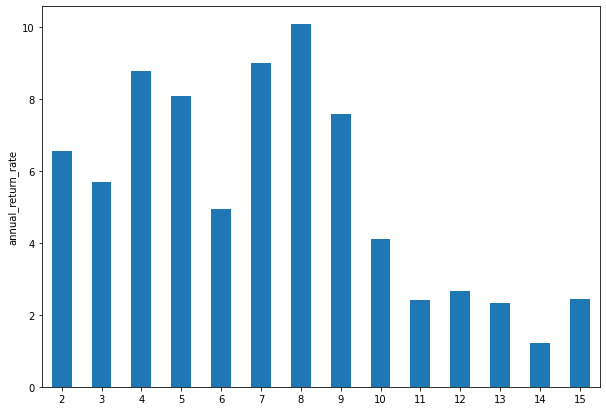

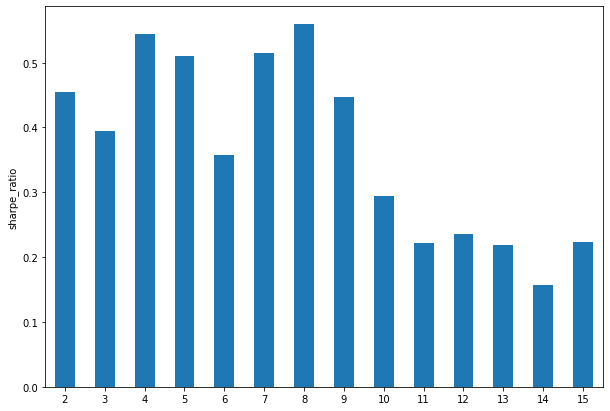

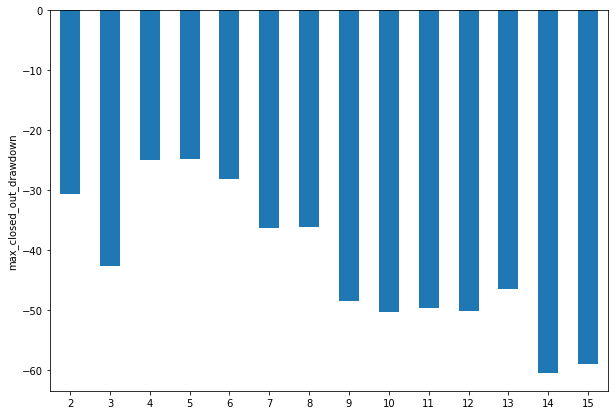

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2007-03-08 00:00:00 BUY  260 GDX @ 38.35
2020-04-24 00:00:00 SELL 260 GDX @ 33.93


Equity curve

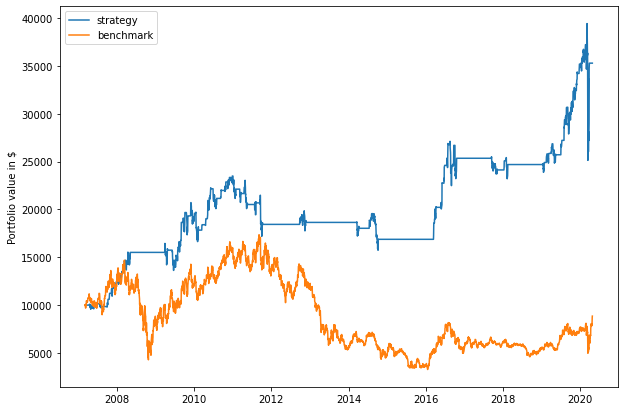

In [9]:
pf.plot_equity_curve(strategies['8'].dbal, benchmark=benchmark.dbal)